<a href="https://colab.research.google.com/github/blandersonw/MachineLearning/blob/main/HW8_1_BlakeAnderson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this homework, we will test PCA in different settings.

First, import the Fashion MNIST dataset. (Refer to your HW3).

 

Use sklearn's PCA module to compute the PCs.

1. Plot the curve of explained variance vs number of PCs. 

2. Plots the first 10 PCs as images. What do you see?

 

3-1. How many PCs do you need to explain 95% of the total variance?

3-2. Plot the first 25 original images (use 5 x 5 grid) and the corresponding 25 compressed images (use 5 x 5 grid)

 

4-1. How many PCs do you need to explain 90% of the total variance?

4-2. Plot the first 25 original images (use 5 x 5 grid) and the corresponding 25 compressed images (use 5 x 5 grid)

 

5-1. How many PCs do you need to explain 75% of the total variance?

5-2. Plot the first 25 original images (use 5 x 5 grid) vs the corresponding 25 compressed images (use 5 x 5 grid)


In [ ]:
import os
import tarfile
import urllib.request
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd MyDrive
!git clone https://github.com/zalandoresearch/fashion-mnist.git
%cd fashion-mnist/

[Errno 2] No such file or directory: 'MyDrive'
/content
Cloning into 'fashion-mnist'...
remote: Enumerating objects: 762, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 762 (delta 0), reused 3 (delta 0), pack-reused 758
Receiving objects: 100% (762/762), 105.85 MiB | 63.72 MiB/s, done.
Resolving deltas: 100% (444/444), done.
/content/fashion-mnist


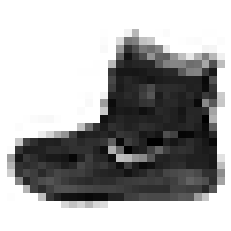

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from utils import mnist_reader

X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

some_digit = X_train[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

plt.show()

Plotting one image for testing sake

In [ ]:
def plot_images(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Function to display images from lecture notes

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

X,y = mnist_reader.load_mnist('data/fashion')
pca = PCA()
pca.fit_transform(X)

array([[-1.23993791e+02,  1.63307440e+03, -1.21104119e+03, ...,
         1.01150286e-02,  5.26382395e-02, -5.02000937e-03],
       [ 1.40792885e+03, -4.51641336e+02, -2.61027034e+02, ...,
        -8.79471010e-03,  3.30199846e-02, -1.61369260e-02],
       [-7.25910795e+02, -1.10183814e+03,  1.06154242e+02, ...,
         2.84631329e-03, -1.86294713e-03,  3.40699335e-05],
       ...,
       [ 8.57750196e+02, -1.18024018e+03, -5.20693994e+02, ...,
         7.48279798e-03,  4.77206726e-03,  4.08772823e-04],
       [-8.07476526e+02, -5.81218873e+02,  4.80319909e+02, ...,
         1.78505182e-02,  8.62760426e-03, -8.82580453e-03],
       [-1.81566381e+03, -1.19743343e+02,  4.68913798e+02, ...,
        -9.26107792e-04,  2.71390294e-02, -4.12902898e-04]])

Applying PCA

In [ ]:

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

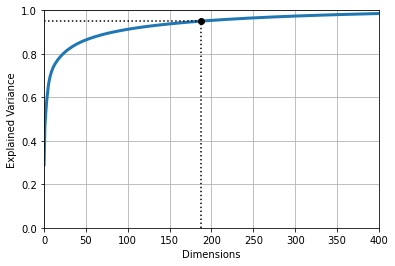

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

Displaying variance as a function of # of dimensions

In [ ]:
def pca_var(var):
  pca = PCA(n_components=var)
  X_reduced = pca.fit_transform(X)
  print(pca.n_components_)
  X_recovered = pca.inverse_transform(X_reduced)
  plot25(X_recovered)

def plot25(X_recovered): 
  plt.figure(figsize=(10, 10))
  plt.subplot(121)
  plot_images(X[::2400])
  plt.title("Original", fontsize=16)
  plt.subplot(122)
  plot_images(X_recovered[::2400])
  plt.title("Compressed", fontsize=16)

Function to calculate # of PCs required to explained inputted variance, and then plot the subsequent result.

187


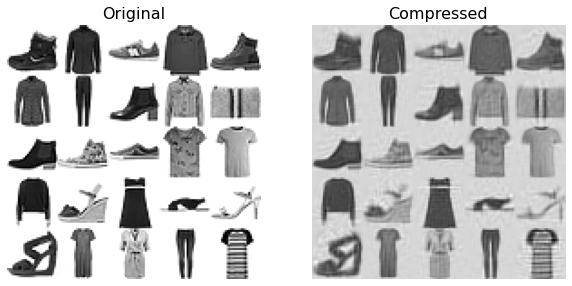

In [ ]:
pca_var(.95)

By reducing pca down to including only the necessary PCs required to explain 95% of variance and then calling n_components_ on the reduced pca, we calculate that we only need 187 PCs.


84


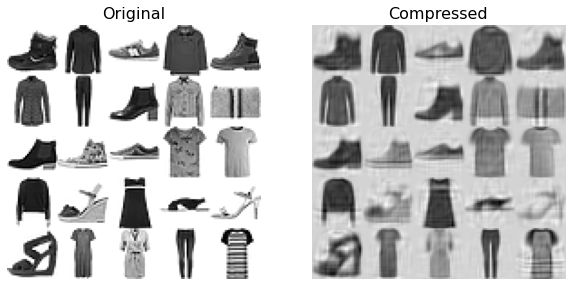

In [ ]:
pca_var(.90)

By reducing pca down to including only the necessary PCs required to explain 90% of variance and then calling n_components_ on the reduced pca, we calculate that we only need 84 PCs.

14


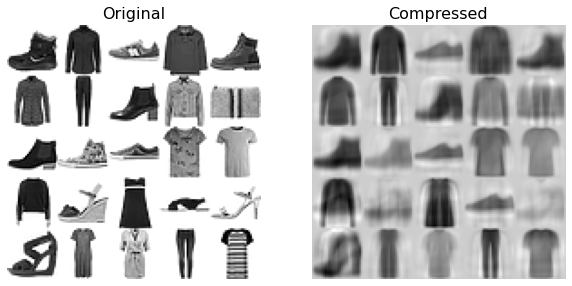

In [ ]:
pca_var(.75)

By reducing pca down to including only the necessary PCs required to explain 75% of variance and then calling n_components_ on the reduced pca, we calculate that we only need 14 PCs.